In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Create model to predict the Species of Iris

In [2]:
import numpy as np                # mathematical calculations
import pandas as pd               # manipulation of raw data 
import matplotlib.pyplot as plt   # plotting graphs
%matplotlib inline  

In [3]:
path ='/gdrive/My Drive/Online_ML : Weekends Nov 2020/Assignments/Data/'

In [4]:
Iris_data = pd.read_csv(path+'Iris.csv')

In [5]:
Iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
Iris_data.shape

(150, 6)

In [7]:
Iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
Iris_data.drop(['Id'], axis = 1) 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
data = Iris_data.rename({'SepalLengthCm' : 'SepalLength', 'SepalWidthCm' : 'SepalWidth','PetalLengthCm' : 'PetalLength', 'PetalWidthCm' : 'PetalWidth'}, axis=1)

In [10]:
Iris = data.drop(['Id'], axis = 1) 

In [11]:
Iris.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# Species columns has the text let us find out anyspecial which can help us out to do label encoder for this output text columns

# find out unique value of columns
Iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
# there are 3 unique value in the columns we will use Labelencoder
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
Iris['Species']= le.fit_transform(data['Species']) 

In [24]:
Iris.head(5)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   SepalLength  150 non-null    int64
 1   SepalWidth   150 non-null    int64
 2   PetalLength  150 non-null    int64
 3   PetalWidth   150 non-null    int64
 4   Species      150 non-null    int64
dtypes: int64(5)
memory usage: 6.0 KB


In [35]:
Iris['PetalLength'] = Iris['PetalLength'].astype(int)

In [37]:
Iris['SepalLength'] = Iris['SepalLength'].astype(int)
Iris['SepalWidth'] = Iris['SepalWidth'].astype(int)
Iris['PetalWidth'] = Iris['PetalWidth'].astype(int)

In [39]:
cols=Iris.shape[1]

In [40]:
y=Iris.iloc[:,:1]
x=Iris.iloc[:,1:cols]

In [41]:
y.shape, x.shape

((150, 1), (150, 4))

In [42]:
x = np.array(x)
y = np.ravel(y)

In [43]:
x.shape, y.shape

((150, 4), (150,))

In [44]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size =0.25, random_state =2)
X_train.shape, x_test.shape, Y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)

model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
train_pred = model.predict(X_train)
test_pred = model.predict(x_test)

In [50]:
scr = model.score(X_train, Y_train)
print('Train F1 Score = {} %'.format(round(scr,4)*100))

scr = model.score(x_test, y_test)
print('Test F1 Score = {} %'.format(round(scr,4)*100))


Train F1 Score = 66.96 %
Test F1 Score = 57.89 %


[[ 0  9  0  0]
 [ 0 11  2  0]
 [ 0  4  9  0]
 [ 0  0  1  2]]


Text(0.5, 1.0, 'Test F1 Score:57.89%')

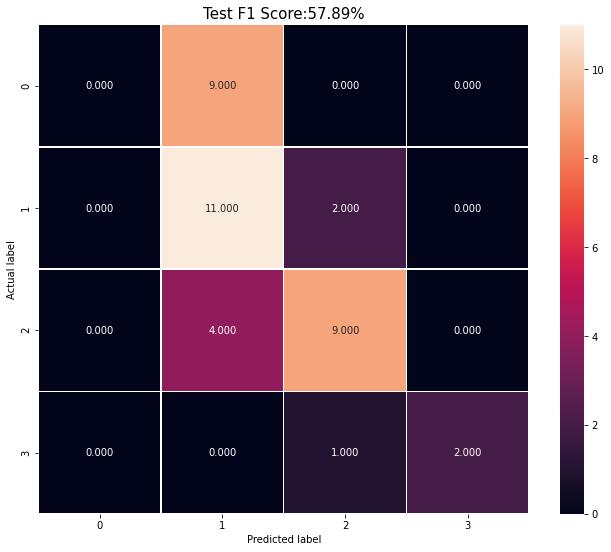

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, test_pred)
print(conf_matrix)

plt.figure(figsize=(11,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test F1 Score:{}%'.format(round(scr, 4)*100)
plt.title(all_sample_title, size = 15)

In [54]:
from sklearn.metrics import classification_report

print('*********************  Training Data Report  **********')
print(classification_report(Y_train, train_pred))

print('***********************  Test Data Report  **********')
print(classification_report(y_test, test_pred))

*********************  Training Data Report  **********
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        13
           5       0.61      0.79      0.69        48
           6       0.71      0.71      0.71        41
           7       0.89      0.80      0.84        10

    accuracy                           0.67       112
   macro avg       0.55      0.57      0.56       112
weighted avg       0.60      0.67      0.63       112

***********************  Test Data Report  **********
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.46      0.85      0.59        13
           6       0.75      0.69      0.72        13
           7       1.00      0.67      0.80         3

    accuracy                           0.58        38
   macro avg       0.55      0.55      0.53        38
weighted avg       0.49      0.58      0.51        38



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Logistics Regression give 66% F1 score the model perform fairly so we need to find out the better model to give better prediction